# Tarea #1

## Imports

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Análisis Exploratorio de Datos (EDA) y Limpieza
Abrir los datos con pandas:

In [64]:
dataset=pd.read_csv('./house_price_regression_dataset.csv')
dataset.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Se puede observar que el dataset se abre de forma correcta.

In [66]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Square_Footage,1000.0,2815.422000,1255.514921,503.000000,1749.500000,2862.500000,3849.500000,4.999000e+03
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.000000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.000000,3.000000,3.000000e+00
Year_Built,1000.0,1986.550000,20.632916,1950.000000,1969.000000,1986.000000,2004.250000,2.022000e+03
Lot_Size,1000.0,2.778087,1.297903,0.506058,1.665946,2.809740,3.923317,4.989303e+00
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.000000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.000000,8.000000,1.000000e+01
House_Price,1000.0,618861.018647,253568.058375,111626.853424,401648.228909,628267.291129,827141.277637,1.108237e+06


## Tratar Nulos

In [67]:
dataset.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

Como se puede observar, no hay datos nulos en el dataset

## Manejar Outliers

<Axes: xlabel='Square_Footage'>

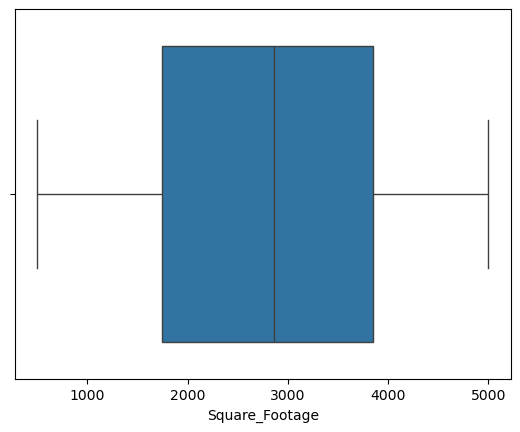

In [68]:
sns.boxplot(dataset,x='Square_Footage')

Para manejar los outliers se utilizará la técnica de IQR o rango intercuantílico

In [69]:

q1=dataset.quantile(.25)
q3=dataset.quantile(.75)
IQR=q3-q1
LowerBound=q1-1.5*IQR
UpperBound=q3+1.5*IQR
dataset=dataset[(dataset>LowerBound)&(dataset<UpperBound)]



In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Como se puede observar, no hubo instancias fuera del rango. Por lo tanto, no hay outliers

## 2. Selección de Características
Mapa de calor de la matriz de correlación de pearson:

<Axes: >

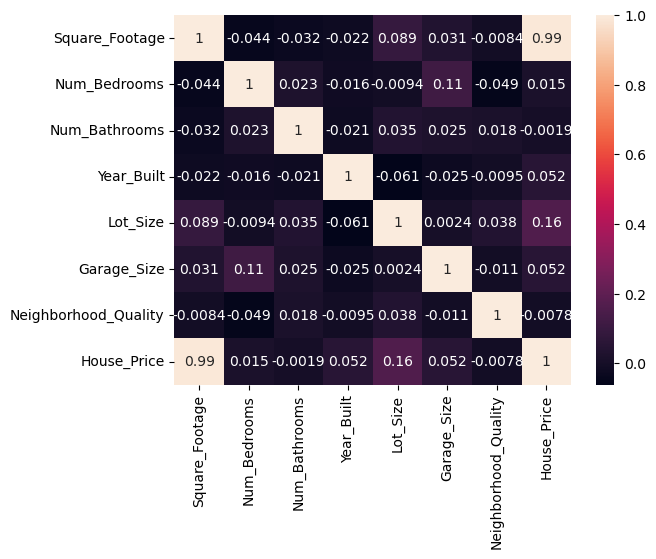

In [71]:
sns.heatmap(dataset.corr('pearson'),annot=True)

Mapa de calor de la matriz de correlación de spearman:

<Axes: >

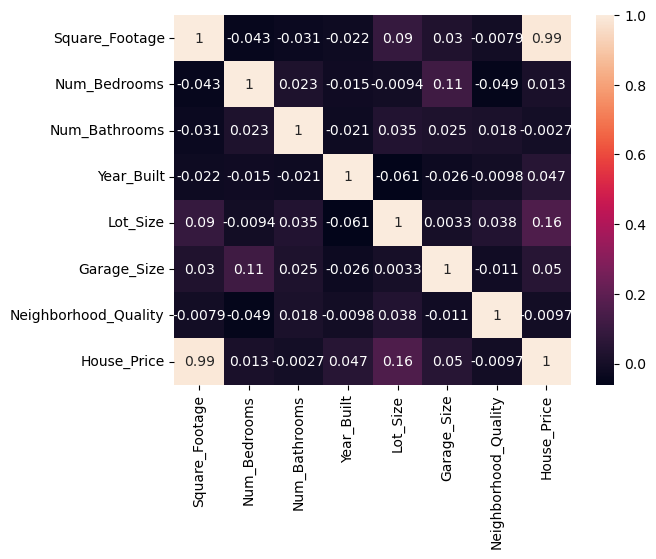

In [72]:
sns.heatmap(dataset.corr('spearman'),annot=True)

Como se puede observar, las variables con mayor correlación con el precio de la casa son los pies cuadrados, el año de construcción, el tamaño del lote y el tamaño del garaje. Todos estos datos alcanzan una correlación mayor a 0.05, por lo tanto se utilizarán para entrenar un modelo. También se hará un modelo con el tamaño del lote y los pies cuadrados únicamente. Que son los únicos 2 con correlación > 0.1.

## Division de los datos
La división de datos se hace con random sampling, haciendo un shuffle de los datos.
#### División de dataset con todos los features

In [73]:
# Normalizacion de los datos
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

columns = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 
            'Year_Built', 'Lot_Size', 'Garage_Size', 
            'Neighborhood_Quality', 'House_Price']

dataset = pd.DataFrame(data=dataset, columns=columns)
dataset.head(2)


X = dataset.drop(["House_Price"], axis=1)
y = dataset["House_Price"]

# se dividen los sets 
# Set inicial se divide en entrenamiento y test 80% - 20% respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Dividir el 80% restante en entrenamiento (70%) y validación (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=0, shuffle=True)



#### División de dataset con pies cuadrados, año de construcción, tamaño del lote y tamaño del garaje

In [74]:
X1 = dataset.drop(["House_Price", "Num_Bedrooms", "Num_Bathrooms", "Neighborhood_Quality"], axis=1)
y1 = dataset["House_Price"]

# se dividen los sets 
# Set inicial se divide en entrenamiento y test 80% - 20% respectivamente
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0, shuffle=True)

# Dividir el 80% restante en entrenamiento (70%) y validación (10%)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.125, random_state=0, shuffle=True)

#### División de dataset con pies cuadrados y tamaño del lote

In [75]:
X2 = dataset.drop(["House_Price", "Num_Bedrooms", "Year_Built", "Num_Bathrooms", "Garage_Size", "Neighborhood_Quality"], axis=1)
y2 = dataset["House_Price"]

# se dividen los sets 
# Set inicial se divide en entrenamiento y test 80% - 20% respectivamente
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0, shuffle=True)

# Dividir el 80% restante en entrenamiento (70%) y validación (10%)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.125, random_state=0, shuffle=True)

## 3. Normalizacion de los datos

In [76]:
#sc = StandardScaler()
#dataset = sc.fit_transform(dataset)

## 4. Conversion a un dataframe

In [77]:
# columns = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 
#            'Year_Built', 'Lot_Size', 'Garage_Size', 
#            'Neighborhood_Quality', 'House_Price']

# dataset = pd.DataFrame(data=dataset, columns=columns)
# dataset.head(2)

## 6. Entrenamiento
### Implementación de Regresión Lineal

In [78]:
def modelo(x, w, b):
    '''
    Calcula la regresión lineal basada en los parámetros w y b con respecto a x.

    Parámetros:
    x (array-like): Vector de características.
    w (array-like): Vector de pesos.
    b (float): Bias (también conocido como sesgo).

    Retorna:
    array-like: Resultado de la regresión lineal.
    '''

    return w*x + b

#### Cálculo de error

In [79]:
def MSE(y, output):
    return (output-y)**2

#### Funciones para Actualización de Parámetros

In [80]:
def derivada_L_w(x, y, output):
    '''
    Calcula el resultado de la derivada de L respecto W
    output = wx+b
    '''
    return 2*x*(output - y)

In [81]:
def derivada_L_b(x, y, output):
    '''
    Calcula el resultado de la derivada de L respecto b
    output = wx+b
    '''
    return 2*(output-y)

### Funciones de Graficación
#### Función de Gráfico de MSE

In [82]:
def plotMSE(historial_mse_epochs):
    # Puntos de cada MSE
    epochs, mses = zip(*historial_mse_epochs)

    # Graficar la recta generada por el modelo
    plt.scatter(epochs, mses, color='red')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title(f'Curva de Error | Epoch {max(epochs)}')
    plt.grid(True)
    plt.show()

#### Función de Gráfico de Testing

In [83]:
# def plotRegresion(w, b):
#     # Generar datos para graficar
#     x_data = np.linspace(-10, 10, 100)  # Genera 100 puntos entre -10 y 10

#     # Calcular los valores de y utilizando el modelo
#     y_data = modelo(x_data, w, b)

#     # Puntos de muestra
#     samples = [(1, 2), (2, 4), (3, 6), (4, 8)]
#     sample_x, sample_y = zip(*samples)

#     # Graficar la recta generada por el modelo
#     plt.plot(, label='Recta de Regresión f(x)')
#     plt.scatter(sample_x, sample_y, color='red', label='Datos entrenamiento')  # Agregar puntos de muestra
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('Recta de Regresión Lineal con datos de entrenamiento')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

## Training

In [84]:
def generar_params_iniciales(*dimensiones_w):
    w = np.random.rand(*dimensiones_w)
    b = np.random.default_rng().random()
    return w, b

In [85]:
def entrenar(training_dataset, training_labels, validation_dataset, validation_labels, epochs = 400, alfa = 0.005, plot_cada_n=-1):
    w, b = generar_params_iniciales(*training_dataset.columns.shape)

    print(f"Valores iniciales:, B = {b:.5F}, W =", w)

    historial_error_epochs = []

    # Época
    for epoch in range(epochs):
        errores_por_instancia = []
        derivadas_w = []
        derivadas_b = []
        for (x, y) in zip(training_dataset.values, training_labels):
            # Correr el modelo por cada instancia y calcular su error y funcion de pérdida
            output = modelo(x, w, b)
            error = MSE(y, output)
            errores_por_instancia.append(error)
            derivada_w = derivada_L_w(x, y, output)
            derivadas_w.append(derivada_w)
            derivada_b = derivada_L_b(x, y, output)
            derivadas_b.append(derivada_b)

        # Cálculo de Promedios
        promedio_dw = np.mean(derivadas_w, axis=0)
        promedio_db = np.mean(derivadas_b)
        promedio_error = np.mean(errores_por_instancia)

        historial_error_epochs.append((epoch, promedio_error))

        # Actualización de Parámetros
        w = w - alfa*promedio_dw
        b = b - alfa*promedio_db

        if (plot_cada_n > 0 and epoch != 0 and epoch % plot_cada_n == 0):
            print(f"Epoca {epoch}, valor de función de perdida (Loss Function) = {promedio_error:.5F}, B = {b:.5F}, W =", w)
            plotMSE(historial_error_epochs)

        # TODO: VALIDACION

    return w, b


## Testing

In [86]:
def testear(w, b, testing_dataset, testing_labels, ):
    #TODO: Esto hay que cambiarlo, por métricas de Loss y Accuracy
    errores_por_instancia = []
    for (x, y) in zip(testing_dataset.values, testing_labels):
        output = modelo(x, w, b)
        error = MSE(output, y)
        errores_por_instancia.append(error)

    promedio_error = np.mean(errores_por_instancia)
    
    print(f"Valor de función de perdida (Loss Function) para testing = {promedio_error:.5F}")


# Ejecuciones:
## Correr training con todos los features: Epochs 400 y Alfa: 0.00000003

Valores iniciales:, B = 0.08289, W = [0.70806065 0.29304911 0.70877699 0.10481875 0.71272579 0.63145715
 0.29646612]
Epoca 50, valor de función de perdida (Loss Function) = 0.93100, B = 0.04752, W = [0.83925944 0.15683117 0.39020313 0.06952922 0.45652836 0.36891275
 0.16136381]


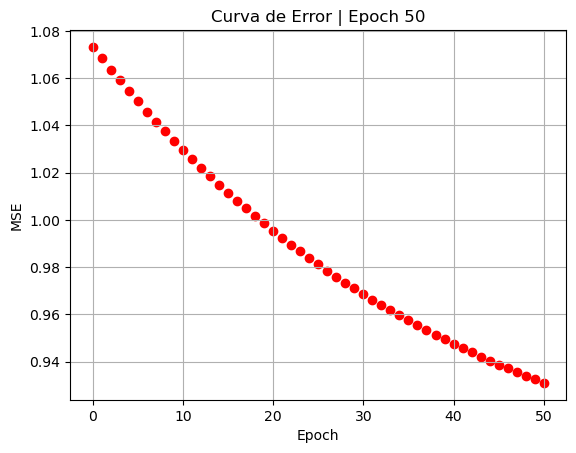

Epoca 100, valor de función de perdida (Loss Function) = 0.88860, B = 0.02876, W = [0.90827559 0.08446719 0.22051494 0.05068672 0.32102842 0.22825551
 0.08991805]


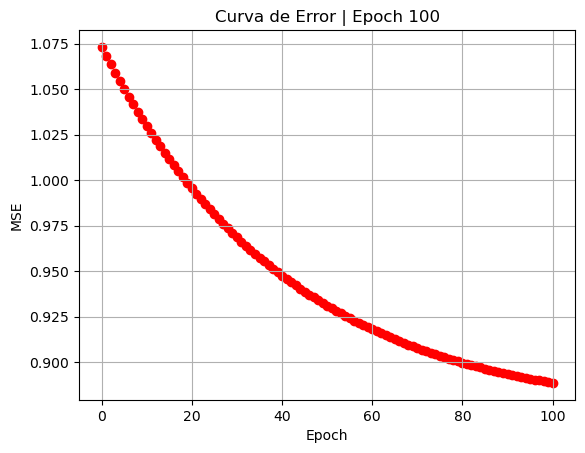

Epoca 150, valor de función de perdida (Loss Function) = 0.87596, B = 0.01855, W = [0.94555996 0.0449935  0.12770914 0.04035656 0.24743732 0.15088245
 0.05112009]


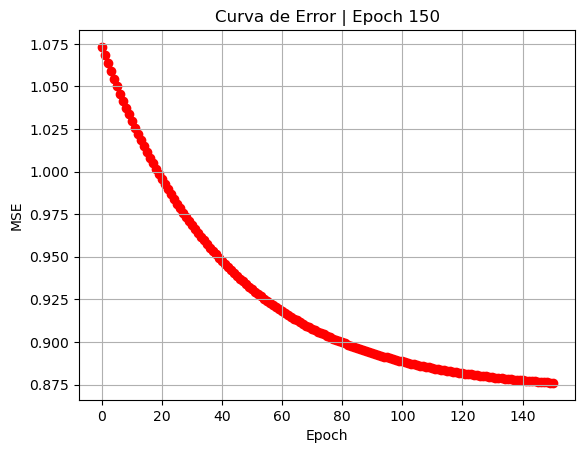

Epoca 200, valor de función de perdida (Loss Function) = 0.87219, B = 0.01300, W = [0.96570222 0.02346117 0.07695223 0.03469314 0.20746942 0.10831964
 0.0300514 ]


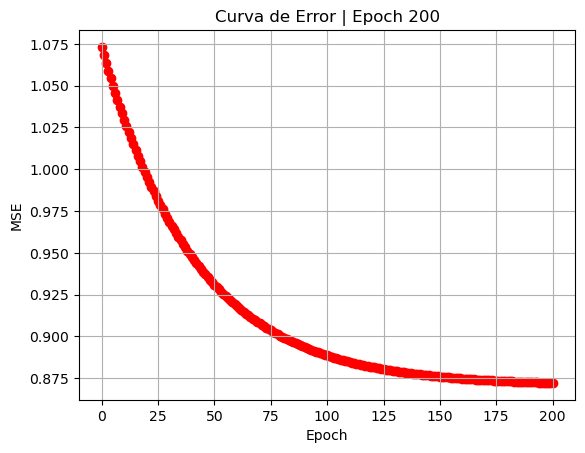

Epoca 250, valor de función de perdida (Loss Function) = 0.87106, B = 0.00998, W = [0.97658388 0.01171565 0.04919273 0.03158819 0.18576254 0.08490521
 0.01861043]


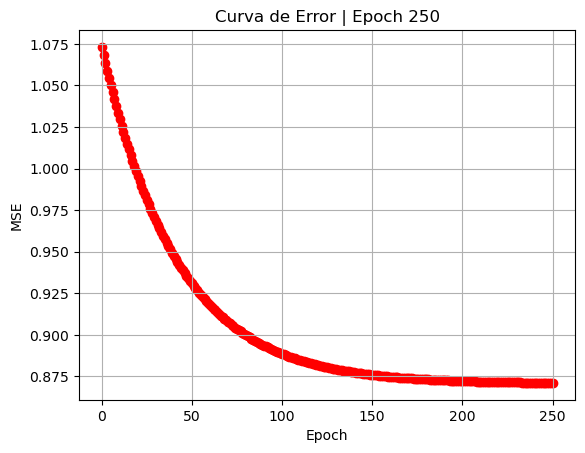

Epoca 300, valor de función de perdida (Loss Function) = 0.87073, B = 0.00833, W = [0.98246265 0.0053087  0.03401088 0.0298859  0.17397336 0.0720242
 0.01239767]


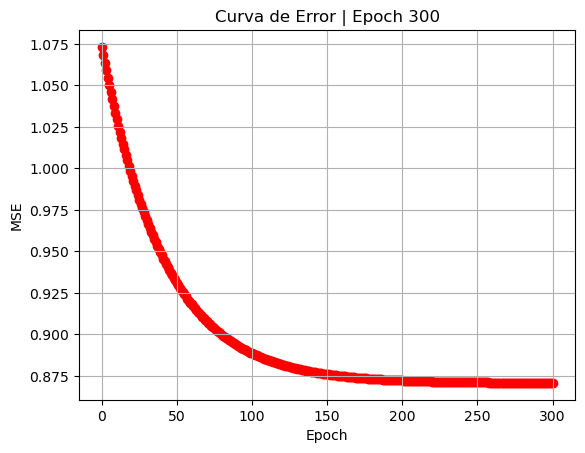

Epoca 350, valor de función de perdida (Loss Function) = 0.87063, B = 0.00744, W = [0.98563867 0.00181386 0.02570791 0.02895261 0.16757058 0.06493775
 0.009024  ]


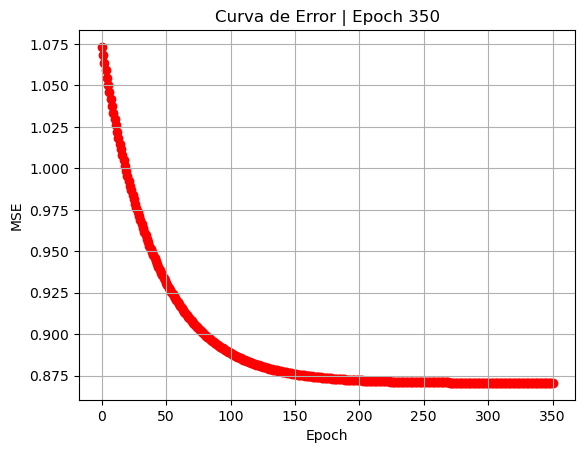

In [105]:
w, b = entrenar(X_train, y_train, X_val, y_val, epochs=400, alfa=0.006, plot_cada_n=50)
# testear(w, b, X_test, y_test)

###

## Correr training con selección de features #1: Epochs 400 y Alfa: 0.0000001

Valores iniciales:, B = 0.94791, W = [0.76847737 0.448596   0.9020635  0.17566707]
Epoca 50, valor de función de perdida (Loss Function) = 1.08487, B = 0.51416, W = [0.86861604 0.25544507 0.55771046 0.11048173]


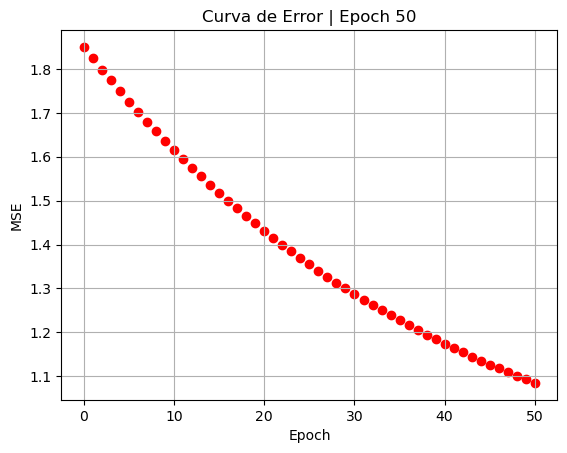

Epoca 100, valor de función de perdida (Loss Function) = 0.85694, B = 0.28333, W = [0.92259493 0.15245058 0.37576663 0.08035918]


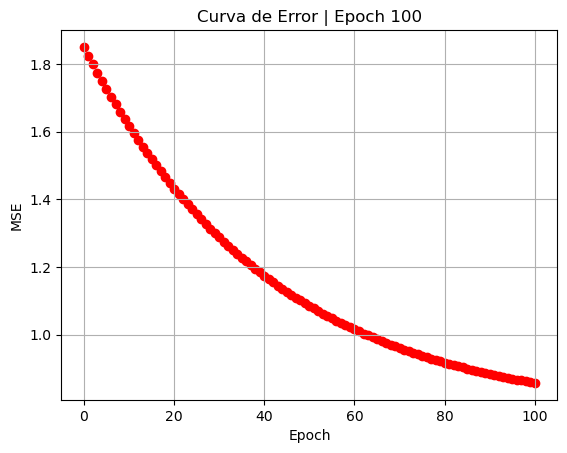

Epoca 150, valor de función de perdida (Loss Function) = 0.78902, B = 0.15717, W = [0.95245777 0.09605915 0.27704908 0.06638886]


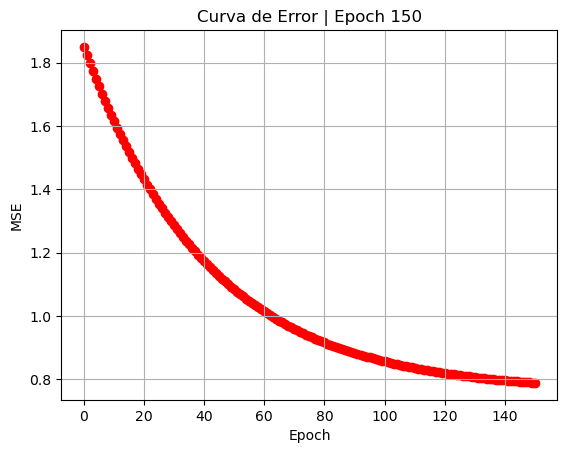

Epoca 200, valor de función de perdida (Loss Function) = 0.76878, B = 0.08822, W = [0.96897383 0.06518366 0.22348818 0.06012861]


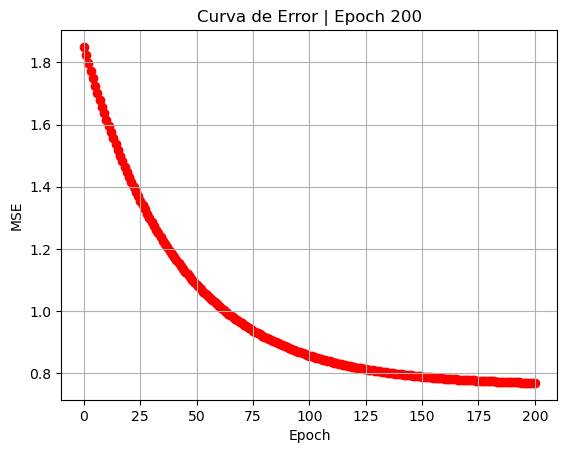

Epoca 250, valor de función de perdida (Loss Function) = 0.76274, B = 0.05053, W = [0.97810562 0.04827862 0.19442803 0.05746573]


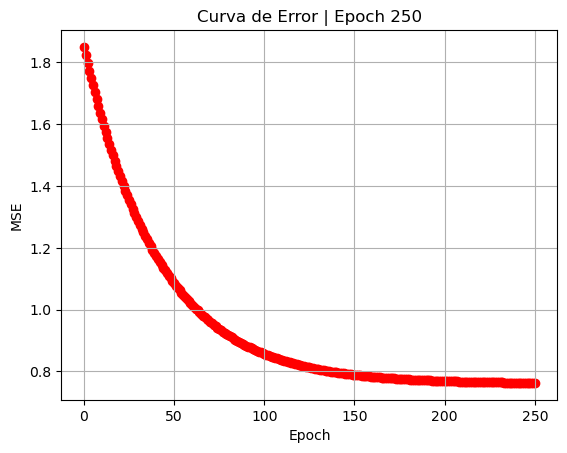

Epoca 300, valor de función de perdida (Loss Function) = 0.76094, B = 0.02992, W = [0.98315322 0.03902267 0.17866121 0.0564289 ]


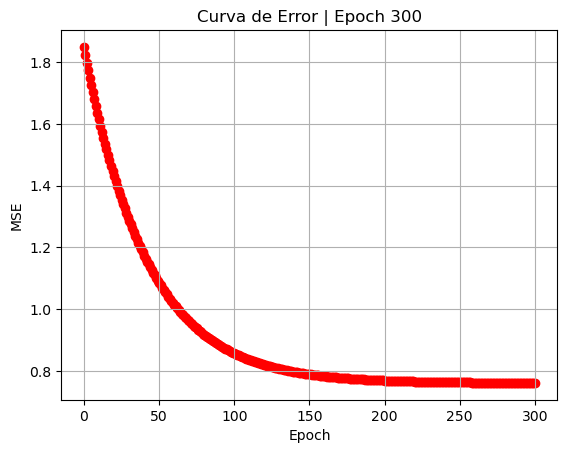

Epoca 350, valor de función de perdida (Loss Function) = 0.76041, B = 0.01865, W = [0.98594255 0.0339548  0.17010687 0.05609318]


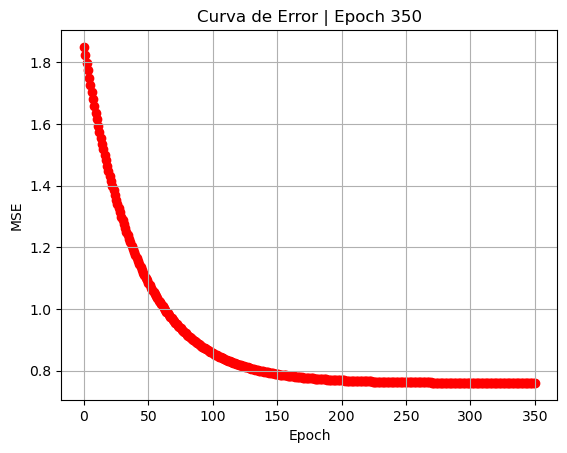

In [96]:
w, b = entrenar(X1_train, y1_train, X1_val, y1_val, epochs=400, alfa=0.006, plot_cada_n=50)
#testear(w, b, X1_test, y1_test)

## Correr training con selección de features #2: Epochs 400 y Alfa: 0.0000001

Valores iniciales:, B = 0.58483, W = [0.55317452 0.35946926]
Epoca 50, valor de función de perdida (Loss Function) = 0.95794, B = 0.58482, W = [0.5531835  0.35946513]


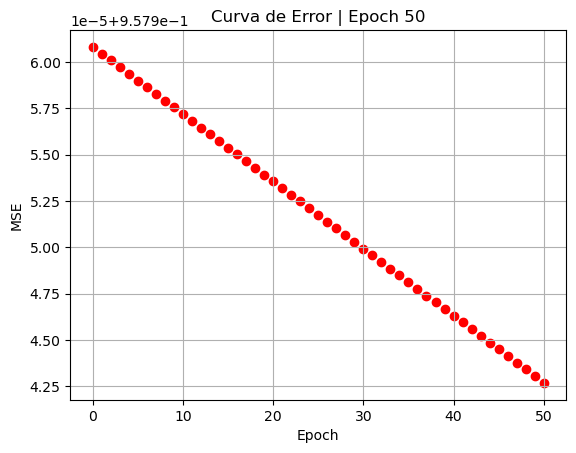

Epoca 100, valor de función de perdida (Loss Function) = 0.95792, B = 0.58480, W = [0.55319231 0.35946107]


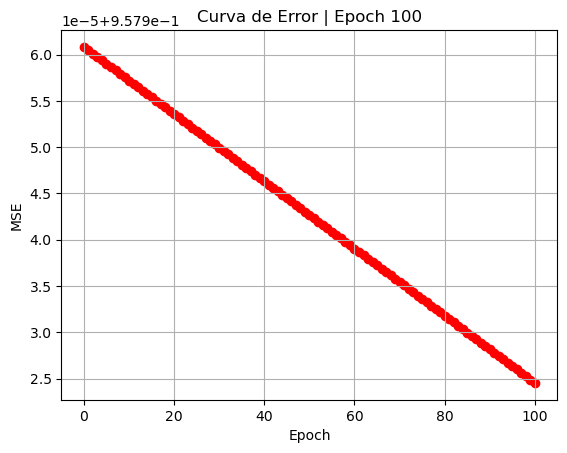

Epoca 150, valor de función de perdida (Loss Function) = 0.95791, B = 0.58479, W = [0.55320112 0.35945702]


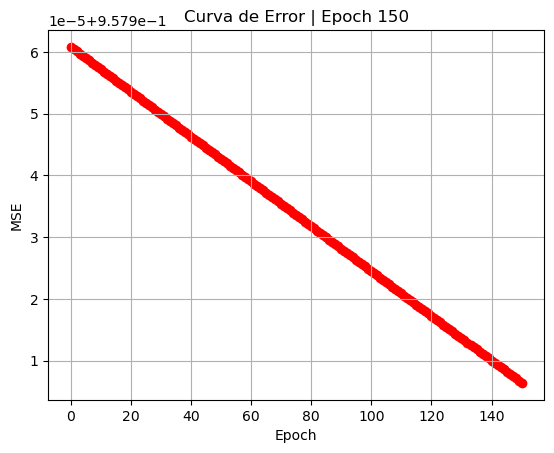

Epoca 200, valor de función de perdida (Loss Function) = 0.95789, B = 0.58478, W = [0.55320993 0.35945297]


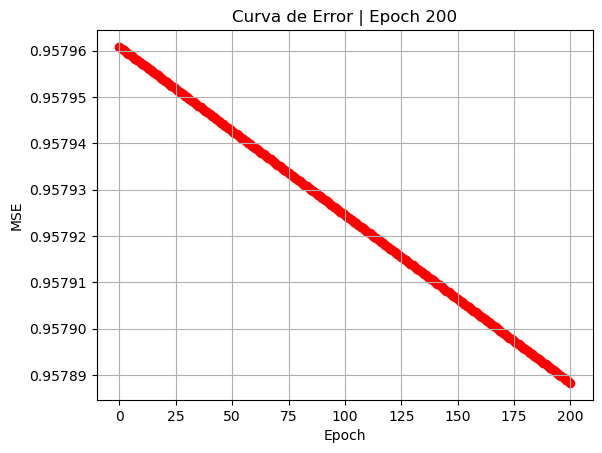

Epoca 250, valor de función de perdida (Loss Function) = 0.95787, B = 0.58477, W = [0.55321873 0.35944892]


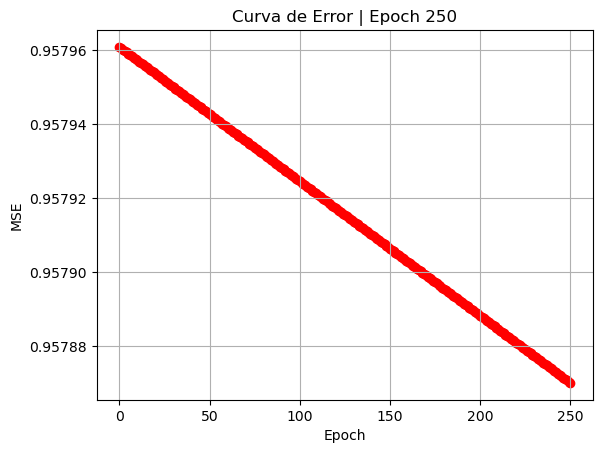

Epoca 300, valor de función de perdida (Loss Function) = 0.95785, B = 0.58476, W = [0.55322754 0.35944487]


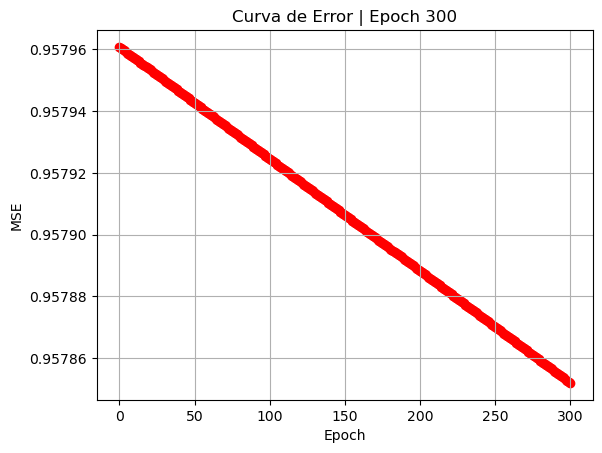

Epoca 350, valor de función de perdida (Loss Function) = 0.95783, B = 0.58475, W = [0.55323635 0.35944082]


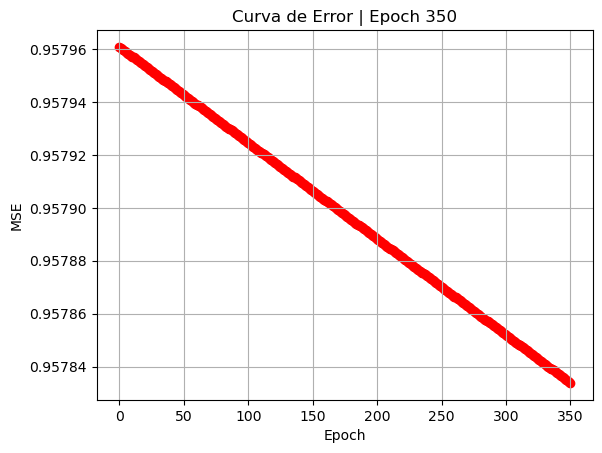

Valor de función de perdida (Loss Function) para testing = 0.90972


In [89]:
w, b = entrenar(X2_train, y2_train, X2_val, y2_val, epochs=400, alfa=0.0000002, plot_cada_n=50)
testear(w, b, X2_test, y2_test)